# Applying Advanced Transformations (Core)

In [148]:
import pandas as pd
import numpy as np
import regex as re
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Using a heavily modified version of the Superheroes dataset from [Kaggle.](https://www.kaggle.com/datasets/claudiodavi/superhero-set)

* The dataset includes two csv's:
    * [superhero_info.csv:](https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv)
        * Contains Name, Publisher, Demographic Info, and Body measurements.
    * [superhero_powers.csv:](https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv)
        * Contains Hero name and list of powers

## load data into DataFrames
    * df_heroes
    * df_powers

In [2]:
# dataset urls
url_heroes = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv'
url_powers = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv'

### df_heroes

In [3]:
df_heroes = pd.read_csv(url_heroes)
display(df_heroes.head(2))
df_heroes.info()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


### df_powers

In [101]:
df_powers = pd.read_csv(url_powers)
display(df_powers.head(2))
df_powers.info()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


## Final combined DataFrame:
***df_superheroes:*** 
* Hero (Just the name of the Hero)
* Publisher
* Gender
* Eye color
* Race
* Hair color
* Height (numeric)
* Skin color
* Alignment
* Weight (numeric)
* Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    * Agility
    * Flight
    * Superspeed etc.

### Prepare df_heros

split 'Hero|Publisher' into separate columns Hero and Publisher

In [5]:
df_heroes[df_heroes.columns[0].split('|')] = df_heroes['Hero|Publisher'].str.split('|',expand=True)
df_heroes.drop(columns=['Hero|Publisher'],inplace=True)
df_heroes.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


split measurements into separate columns, just numerical data drop units 

In [6]:
# first need to format values in measurements into acceptable json format to then load as a dict
## use .str.replace to replace all single quotes
df_heroes['Measurements'] = df_heroes['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
df_heroes['Measurements'] = df_heroes['Measurements'].apply(json.loads)

In [7]:
#use the key values in measurements dict as new column names and set value applying split with pd.Series 
df_heroes[[*df_heroes['Measurements'][0].keys()]] = df_heroes['Measurements'].apply(pd.Series).replace(r'[a-zA-Z]+','',regex=True ).astype('float') 
df_heroes.drop(columns='Measurements',inplace=True)
df_heroes.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [9]:
df_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      463 non-null    object 
 1   Race        463 non-null    object 
 2   Alignment   463 non-null    object 
 3   Hair color  463 non-null    object 
 4   Eye color   463 non-null    object 
 5   Skin color  463 non-null    object 
 6   Hero        463 non-null    object 
 7   Publisher   463 non-null    object 
 8   Height      463 non-null    float64
 9   Weight      463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


### Prepare df_powers
    *  one-hot-encoded columns for every power that appears in the dataset

In [102]:
#adding to a set will only keep unique values
powers = set()
for line in df_powers['Powers']:
    for power in line.split(','):
        powers.add(power)

In [103]:
#convert set to list with sorted() and add as columns
#columns will be true if that value is in original 'Powers' column
for power in sorted(powers):
    df = pd.DataFrame()
    df[power] = df_powers['Powers'].str.contains(power)
    df_powers = pd.concat([df_powers,df],axis=1)

In [107]:
df_powers.rename(columns={'hero_names':'Hero'},inplace=True)
df_powers.drop(columns='Powers',inplace=True)
df_powers.head()

,Hero,Accelerated Healing,Adaptation,Agility,Animal Attributes,Animal Control,Animal Oriented Powers,Animation,Anti-Gravity,Astral Projection,...,Vision - Thermal,Vision - X-Ray,Vitakinesis,Wallcrawling,Water Control,Weapon-based Powers,Weapons Master,Weather Control,Web Creation,Wind Control
0,3-D Man,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Combine df_heroes and df_powers to df_superheroes

In [110]:
df_superheroes = pd.merge(df_heroes,df_powers,on='Hero')
#https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
# shift column 'Hero' to first position
first_column = df_superheroes.pop('Hero')
df_superheroes.insert(0, 'Hero', first_column)
df_superheroes.head()

,Hero,Gender,Race,Alignment,Hair color,Eye color,Skin color,Publisher,Height,Weight,...,Vision - Thermal,Vision - X-Ray,Vitakinesis,Wallcrawling,Water Control,Weapon-based Powers,Weapons Master,Weather Control,Web Creation,Wind Control
0,A-Bomb,Male,Human,good,No Hair,yellow,Unknown,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,Icthyo Sapien,good,No Hair,blue,blue,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,True,False,False,False
2,Abin Sur,Male,Ungaran,good,No Hair,blue,red,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,Human / Radiation,bad,No Hair,green,Unknown,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Male,Human,bad,No Hair,blue,Unknown,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


In [111]:
df_superheroes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 177 entries, Hero to Wind Control
dtypes: bool(167), float64(2), object(8)
memory usage: 115.3+ KB


# Use combined DataFrame to answer the following questions.
    * df_superheroes

In [141]:
#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions
#https://stackoverflow.com/questions/70826659/matplotlib-bar-labels-with-new-f-string-format-style?noredirect=1&lq=1

def human_format(num, pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
formatter = FuncFormatter(human_format)

## Compare the average weight of super powers who have Super Speed to those who do not.

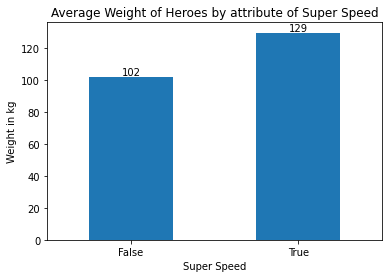

In [204]:
ax = df_superheroes.groupby('Super Speed')['Weight'].mean().plot.bar(x='Super Speed',rot=0)
for container in ax.containers:
    labels = [  f'{human_format(x,1)}' for x in container.datavalues ]
    ax.bar_label(container,labels=labels)
ax.set_title('Average Weight of Heroes by attribute of Super Speed')
plt.ylabel('Weight in kg');

## What is the average height of heroes for each publisher?

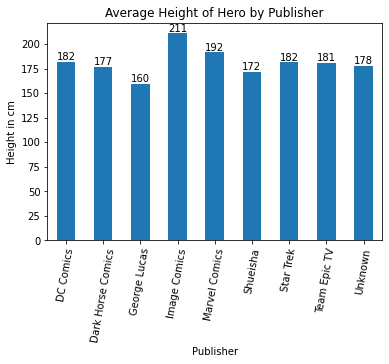

In [161]:
ax = df_superheroes.groupby('Publisher')['Height'].mean().plot.bar(x='Publisher',rot=80)
for container in ax.containers:
    labels = [  f'{human_format(x,1)}' for x in container.datavalues ]
    ax.bar_label(container,labels=labels)
ax.set_title('Average Height of Hero by Publisher');
plt.ylabel('Height in cm');